In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from utils.abundance_filtering import prevalence_filter
import itertools
import seaborn as sns
from upsetplot import UpSet
from upsetplot import from_contents
from upsetplot import generate_counts, plot
import matplotlib.pyplot as plt
from utils.utils import species_name_to_plt_title

In [2]:
bacteria_ab_path = 'data/bacteria_relative_abundance_concat.csv'
cluster_info_path = 'data/tables/cluster_assign.csv'

prevalent_filter_thr = 0.95
rel_ab_threshold= 1e-5
p_thr = 0.05

savefig=True
my_pallete = {'1':"#66c2a4", '2':"#8ea1ca", '3':"#ffd92f",'4':'#b3b3b3'}

In [3]:
bacteria_ab = pd.read_csv(bacteria_ab_path,index_col=0)
bacteria_ab_x = bacteria_ab.drop(['CRC', 'study_name'],axis=1)
bacteria_ab_y = bacteria_ab['CRC']
study_names_df = bacteria_ab[['study_name']]

# preprocess
bacteria_ab_x_preval = prevalence_filter(bacteria_ab_x,rel_ab_threshold , prevalent_filter_thr)
# bacteria_ab_preval = pd.concat([bacteria_ab_x_preval,bacteria_ab_y],axis=1)

print(bacteria_ab_x_preval.shape)
bacteria_ab_x_preval.head(2)

(802, 294)


,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Eubacterium_callanderi,Bacteroides_coprophilus,Lactobacillus_delbrueckii,Aeriscardovia_aeriphila,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796
SAMD00114722,0.000131,0.040444,0.006118,0.00954,0.009849,0.044138,0.080406,0.000000,0.032940,0.006659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAMD00114723,0.000000,0.000000,0.007468,0.00000,0.000011,0.009587,0.014821,0.004957,0.000117,0.006459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cluster_info = pd.read_csv(cluster_info_path,index_col=0)
cluster_info['cluster'] = cluster_info['cluster'].astype(str)
cluster_info.head(2)

,cluster
SAMD00114722,4
SAMD00114723,2


In [5]:
ab_df = pd.concat([bacteria_ab_x_preval,study_names_df],axis=1)
ab_df = ab_df.join(cluster_info)
ab_df['cluster'] = ab_df['cluster'].fillna('control')

ab_df.head(2)

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Lactobacillus_delbrueckii,Aeriscardovia_aeriphila,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796,study_name,cluster
SAMD00114722,0.000131,0.040444,0.006118,0.00954,0.009849,0.044138,0.080406,0.000000,0.032940,0.006659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,4
SAMD00114723,0.000000,0.000000,0.007468,0.00000,0.000011,0.009587,0.014821,0.004957,0.000117,0.006459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,2


In [6]:
dataset_to_countryname = {'YachidaS_2019': 'JP', 'ZellerG_2014':'FR', 'WirbelJ_2018':'DE', 'YuJ_2015':'CN', 'VogtmannE_2016':'US'}
ab_df['cohort_name'] = ab_df['study_name'].map(dataset_to_countryname)
ab_df['cohort_cluster'] = ab_df['cohort_name'] + '_' + ab_df['cluster']

# ab_df_final = ab_df.drop(['study_name','cluster','cohort_name'],axis=1)

ab_df.head(3)

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796,study_name,cluster,cohort_name,cohort_cluster
SAMD00114722,0.000131,0.040444,0.006118,0.00954,0.009849,0.044138,0.080406,0.000000,0.032940,0.006659,...,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,4,JP,JP_4
SAMD00114723,0.000000,0.000000,0.007468,0.00000,0.000011,0.009587,0.014821,0.004957,0.000117,0.006459,...,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,2,JP,JP_2
SAMD00114724,0.000077,0.238579,0.011717,0.00000,0.001122,0.009492,0.142257,0.000000,0.014983,0.005242,...,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,3,JP,JP_3


In [7]:
# control
ab_control = ab_df[ab_df['cluster']=='control']
print(ab_control.shape)

ab_control.head(2)

(497, 298)


,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796,study_name,cluster,cohort_name,cohort_cluster
SAMD00114732,0.000000,0.23274,0.029267,0.00000,0.061031,0.005672,0.002512,0.0,0.166144,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,control,JP,JP_control
SAMD00114734,0.039599,0.00271,0.073229,0.06642,0.002337,0.010392,0.000000,0.0,0.045510,0.000052,...,0.0,0.0,0.0,0.0,0.0,0.0,YachidaS_2019,control,JP,JP_control


# 1. Kruskal Wallis H-test

In [8]:
def h_test(var,data,n_cluster = 4,p_thr=0.005):
    data_per_cluster = []
    for c in range(1,n_cluster+1):
        c_data = list(data[data['cluster']==str(c)][var].values)
        data_per_cluster.append(c_data)
    
    stat, p = stats.kruskal(data_per_cluster[0],data_per_cluster[1],data_per_cluster[2],data_per_cluster[3])

    if p > p_thr:
        remarks = 'Same distributions (fail to reject H0)'
    else:
        remarks = 'Different distributions (reject H0)'
    
    return {'H':stat,'p':p, 'Conclusion':remarks}

In [9]:
study_li = sorted(ab_df['study_name'].unique())
species_list = list(bacteria_ab_x_preval.columns)

results_h = {}
for study_name in study_li:
    study_res = {}
    for bacteria_i in species_list:
        data_i = ab_df[ab_df['study_name']==study_name]
        try:
            h_result = h_test(data=data_i,var=bacteria_i,p_thr=p_thr)
        except:
            # print(f'{study_name} | h test assumptions are violated, skipping {bacteria_i} ')
            pass
        if h_result['p'] <= p_thr:
            study_res[bacteria_i]=h_result
    
    results_h[study_name]=study_res

# h-test results
results_h_df = {}
for study_name in results_h.keys():
    results_h_df[study_name] = pd.DataFrame.from_dict(results_h[study_name]).T

In [10]:
for study in results_h_df:
    results_h_df[study].to_excel(f'output/statistics/h_test/h-test_{study}.xlsx')

# 2. U-test between cohorts and healthy subjects

In [11]:
study_li = sorted(ab_df['study_name'].unique())
for study_name in study_li:
    print(study_name)

VogtmannE_2016
WirbelJ_2018
YachidaS_2019
YuJ_2015
ZellerG_2014


In [12]:
def u_test(cluster_ab, healthy_ab,species,cluster_i):
    cluster_ab_sp = cluster_ab[species]
    healthy_ab_sp = healthy_ab[species]

    stat, p = stats.mannwhitneyu(cluster_ab_sp,healthy_ab_sp, alternative='greater') # , alternative='greater'
    
    if p > p_thr:
        remarks = 'Same distributions (fail to reject H0)'
    else:
        remarks = 'Different distributions (reject H0)'
    
    return {'U':stat,'p':p, 'Conclusion':remarks}

def u_test_significant(cluster_ab, healthy_ab,i,species_list):
    """
    i : cluster name
    species_list: list of bacteria
    """
    abundance_u_test_result = {}
    for species in species_list: 
        abundance_u_test_result[species] = u_test(cluster_ab, healthy_ab,species,i)
        
    abundance_u_test_result_df = pd.DataFrame.from_dict(abundance_u_test_result).T
    signif = abundance_u_test_result_df[abundance_u_test_result_df['p'] < p_thr].sort_values('p')
    
    # print('Number of significant bacteria',signif.shape[0])
    return signif

In [13]:
def log_transform(x,pseudocount=0.01):
    res = np.log10(x+pseudocount) - np.log10(pseudocount)
    return res

In [14]:
# for visualization
log_abundance = ab_df[ab_df.columns[:-4]].apply(log_transform)
log_abundance['cluster'] = ab_df['cluster']
log_abundance['study_name'] = ab_df['study_name']
log_abundance.head(2)

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Lactobacillus_delbrueckii,Aeriscardovia_aeriphila,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796,cluster,study_name
SAMD00114722,0.005661,0.702812,0.207305,0.290926,0.297747,0.733504,0.956199,0.000000,0.632857,0.221649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,YachidaS_2019
SAMD00114723,0.000000,0.000000,0.242239,0.000000,0.000477,0.291963,0.394821,0.174851,0.005061,0.216391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,YachidaS_2019


# 1. YachidaS_2019

In [15]:
log_abundance

,Bacteroides_plebeius,Bacteroides_dorei,Faecalibacterium_prausnitzii,Eubacterium_eligens,Bacteroides_ovatus,Parabacteroides_distasonis,Ruminococcus_gnavus,Phascolarctobacterium_faecium,Bacteroides_uniformis,Bifidobacterium_longum,...,Lactobacillus_delbrueckii,Aeriscardovia_aeriphila,Clostridiales_bacterium_1_7_47FAA,Fretibacterium_fastidiosum,Clostridium_sp_CAG_167,Flavonifractor_sp_An100,Roseburia_sp_CAG_309,Candidatus_Stoquefichus_sp_KLE1796,cluster,study_name
SAMD00114722,0.005661,0.702812,0.207305,0.290926,0.297747,0.733504,0.956199,0.000000,0.632857,0.221649,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,4,YachidaS_2019
SAMD00114723,0.000000,0.000000,0.242239,0.000000,0.000477,0.291963,0.394821,0.174851,0.005061,0.216391,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,2,YachidaS_2019
SAMD00114724,0.003323,1.395465,0.336800,0.000000,0.046191,0.289865,1.182579,0.000000,0.397650,0.183033,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,3,YachidaS_2019
SAMD00114726,0.859024,0.001574,0.366302,0.009149,0.023068,0.284769,0.099873,0.179808,0.214522,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,2,YachidaS_2019
SAMD00114727,0.058025,0.866459,0.471099,0.381572,0.000000,0.849127,0.316947,0.000000,1.027066,0.193517,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,2,YachidaS_2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRS96422329ST-27-0-0,0.000000,0.001640,0.858986,0.127354,0.346458,0.271214,0.011299,0.000000,1.152754,0.293448,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.06103,0.004677,control,VogtmannE_2016
MMRS97052561ST-27-0-0,0.000000,0.000000,0.381390,0.336368,0.495837,0.462470,0.000000,0.000000,1.579353,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,3,VogtmannE_2016
MMRS97307143ST-27-0-0,0.000000,0.008828,1.432015,0.373902,0.078060,0.179257,0.002228,0.000000,0.810141,0.000000,...,0.0,0.000664,0.0,0.0,0.0,0.007608,0.00000,0.000000,control,VogtmannE_2016
MMRS97327636ST-27-0-0,0.000000,0.000000,0.001560,0.000000,0.001336,0.000000,0.487910,0.000000,0.000620,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,4,VogtmannE_2016


In [16]:
def u_test_study(study_name_i):
    h_bacteria_li = results_h_df[study_name_i].index.to_list() 
    study_ab=log_abundance[log_abundance['study_name']==study_name_i]

    significant_bacteria_i = []
    for c_i in ['1','2','3','4']:
        cluster_ab_i=study_ab[(study_ab['study_name']==study_name_i) & (study_ab['cluster']==c_i)]
        
        significant = u_test_significant(species_list=h_bacteria_li,healthy_ab=ab_control,i=c_i,cluster_ab=cluster_ab_i)
        significant_bacteria_list = significant.index.to_list()
        significant_bacteria_i.extend(significant_bacteria_list)
        
        significant.to_excel(f'output/statistics/u_test/{study_name_i}_c{c_i}.xlsx')
        
    significant_bacteria_i = set(significant_bacteria_i)
    print('Number of significant bacteria:',len(significant_bacteria_i))
    return significant_bacteria_i

In [17]:
def boxplot_cluster(study_name_i, significant_bacteria_i,savefig=True,figsize=(32,20),nrows=6, ncols = 5,wspace=0.3,hspace=0.4):
    fig = plt.figure(figsize=figsize,dpi=70) #(width,height)
    # fig.tight_layout(h_pad=1, w_pad=2)

    species_list = list(significant_bacteria_i)
    for i in range(1,len(species_list)+1):
        ax = fig.add_subplot(nrows, ncols, i)
        # data_i = ab_df[ab_df['study_name']==study_name_i]
        data_i=log_abundance[log_abundance['study_name']==study_name_i]


        sns.boxplot(x="cluster", y=species_list[i-1], data=data_i,order=['1','2','3','4'], palette=my_pallete)

        title = species_name_to_plt_title(species_list[i-1])
        # title = species_list[i-1]


        plt.title(title,fontsize=20,style='italic')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)

        plt.ylabel(' ')
        plt.xlabel(' ')
        plt.tight_layout()
    
    if savefig:
        plt.savefig(f'output/images/paper/tif/stat_{study_name_i}.tif',format='tif',bbox_inches='tight',dpi=70) # ,bbox_inches='tight'
        plt.savefig(f'output/images/paper/png/stat_{study_name_i}.png',format='png',bbox_inches='tight',dpi=70) #,bbox_inches='tight'
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    plt.show()

In [31]:
sig_yachida = u_test_study('YachidaS_2019')

Number of significant bacteria: 44


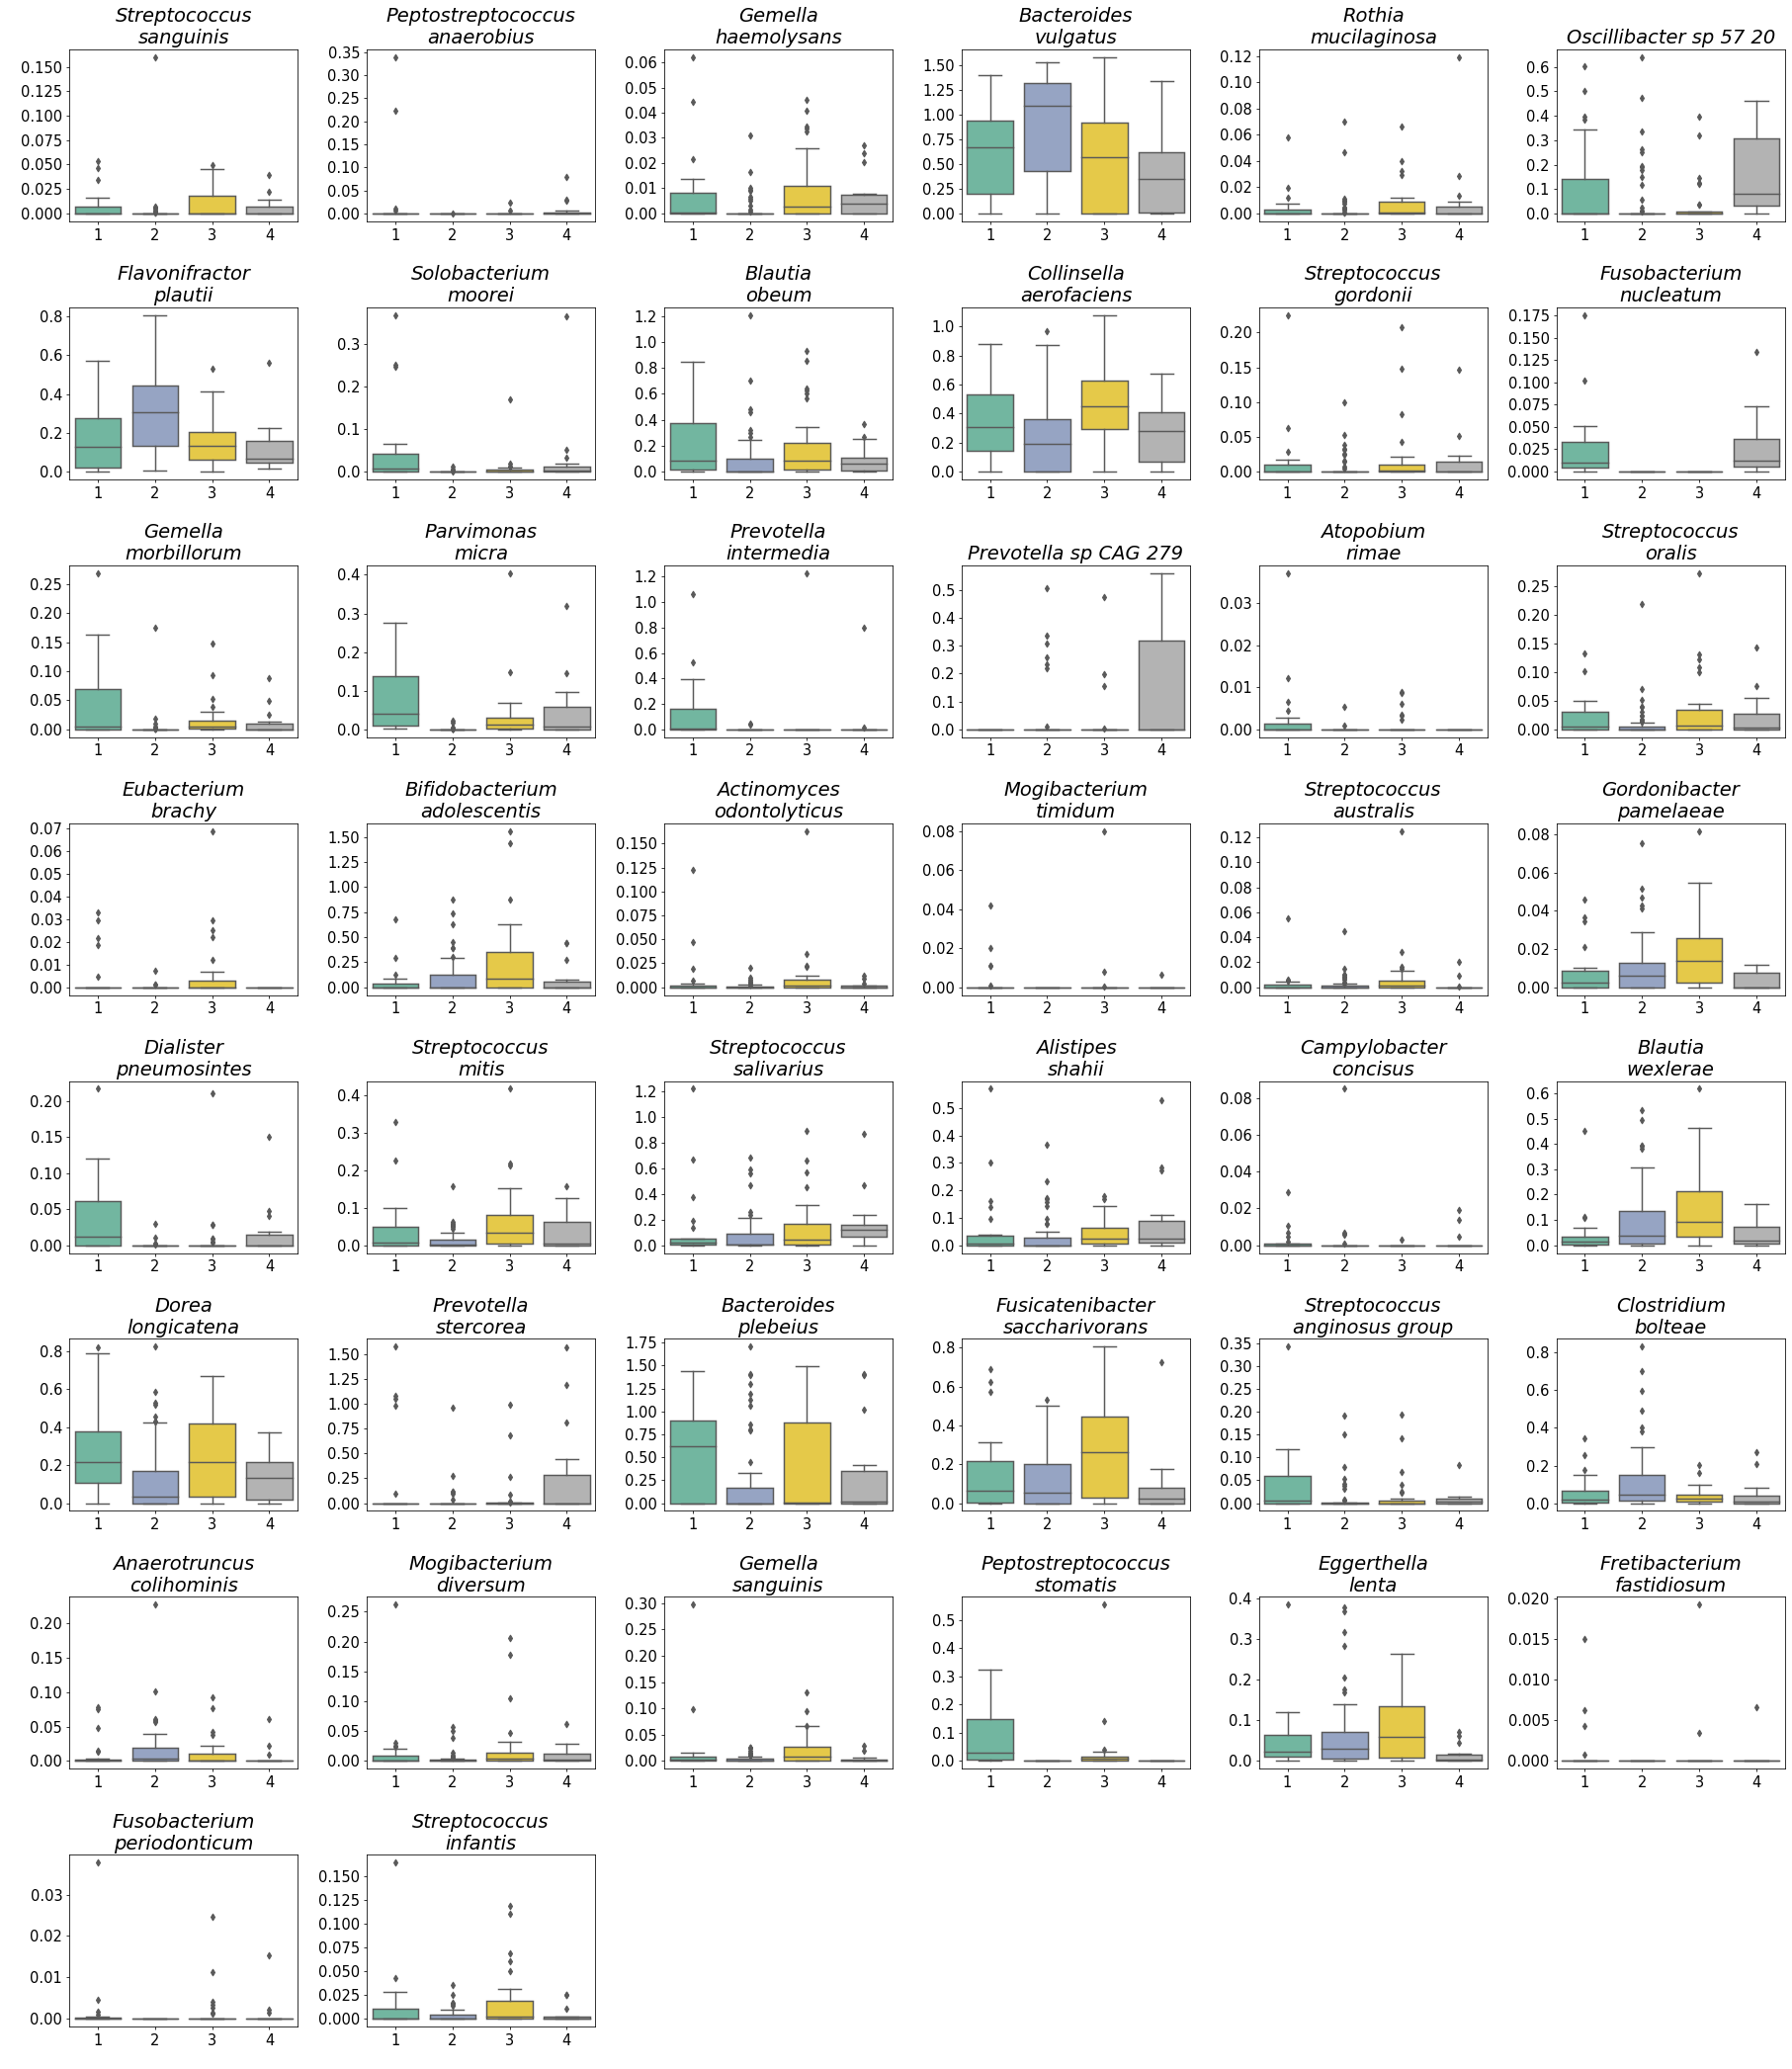

In [19]:
boxplot_cluster('YachidaS_2019',sig_yachida,nrows=8,ncols=6,wspace=0.3,hspace=0.5,figsize=(26,30))

# 2. VogtmannE_2016

In [32]:
sig_vogtmann = u_test_study('VogtmannE_2016')

Number of significant bacteria: 32


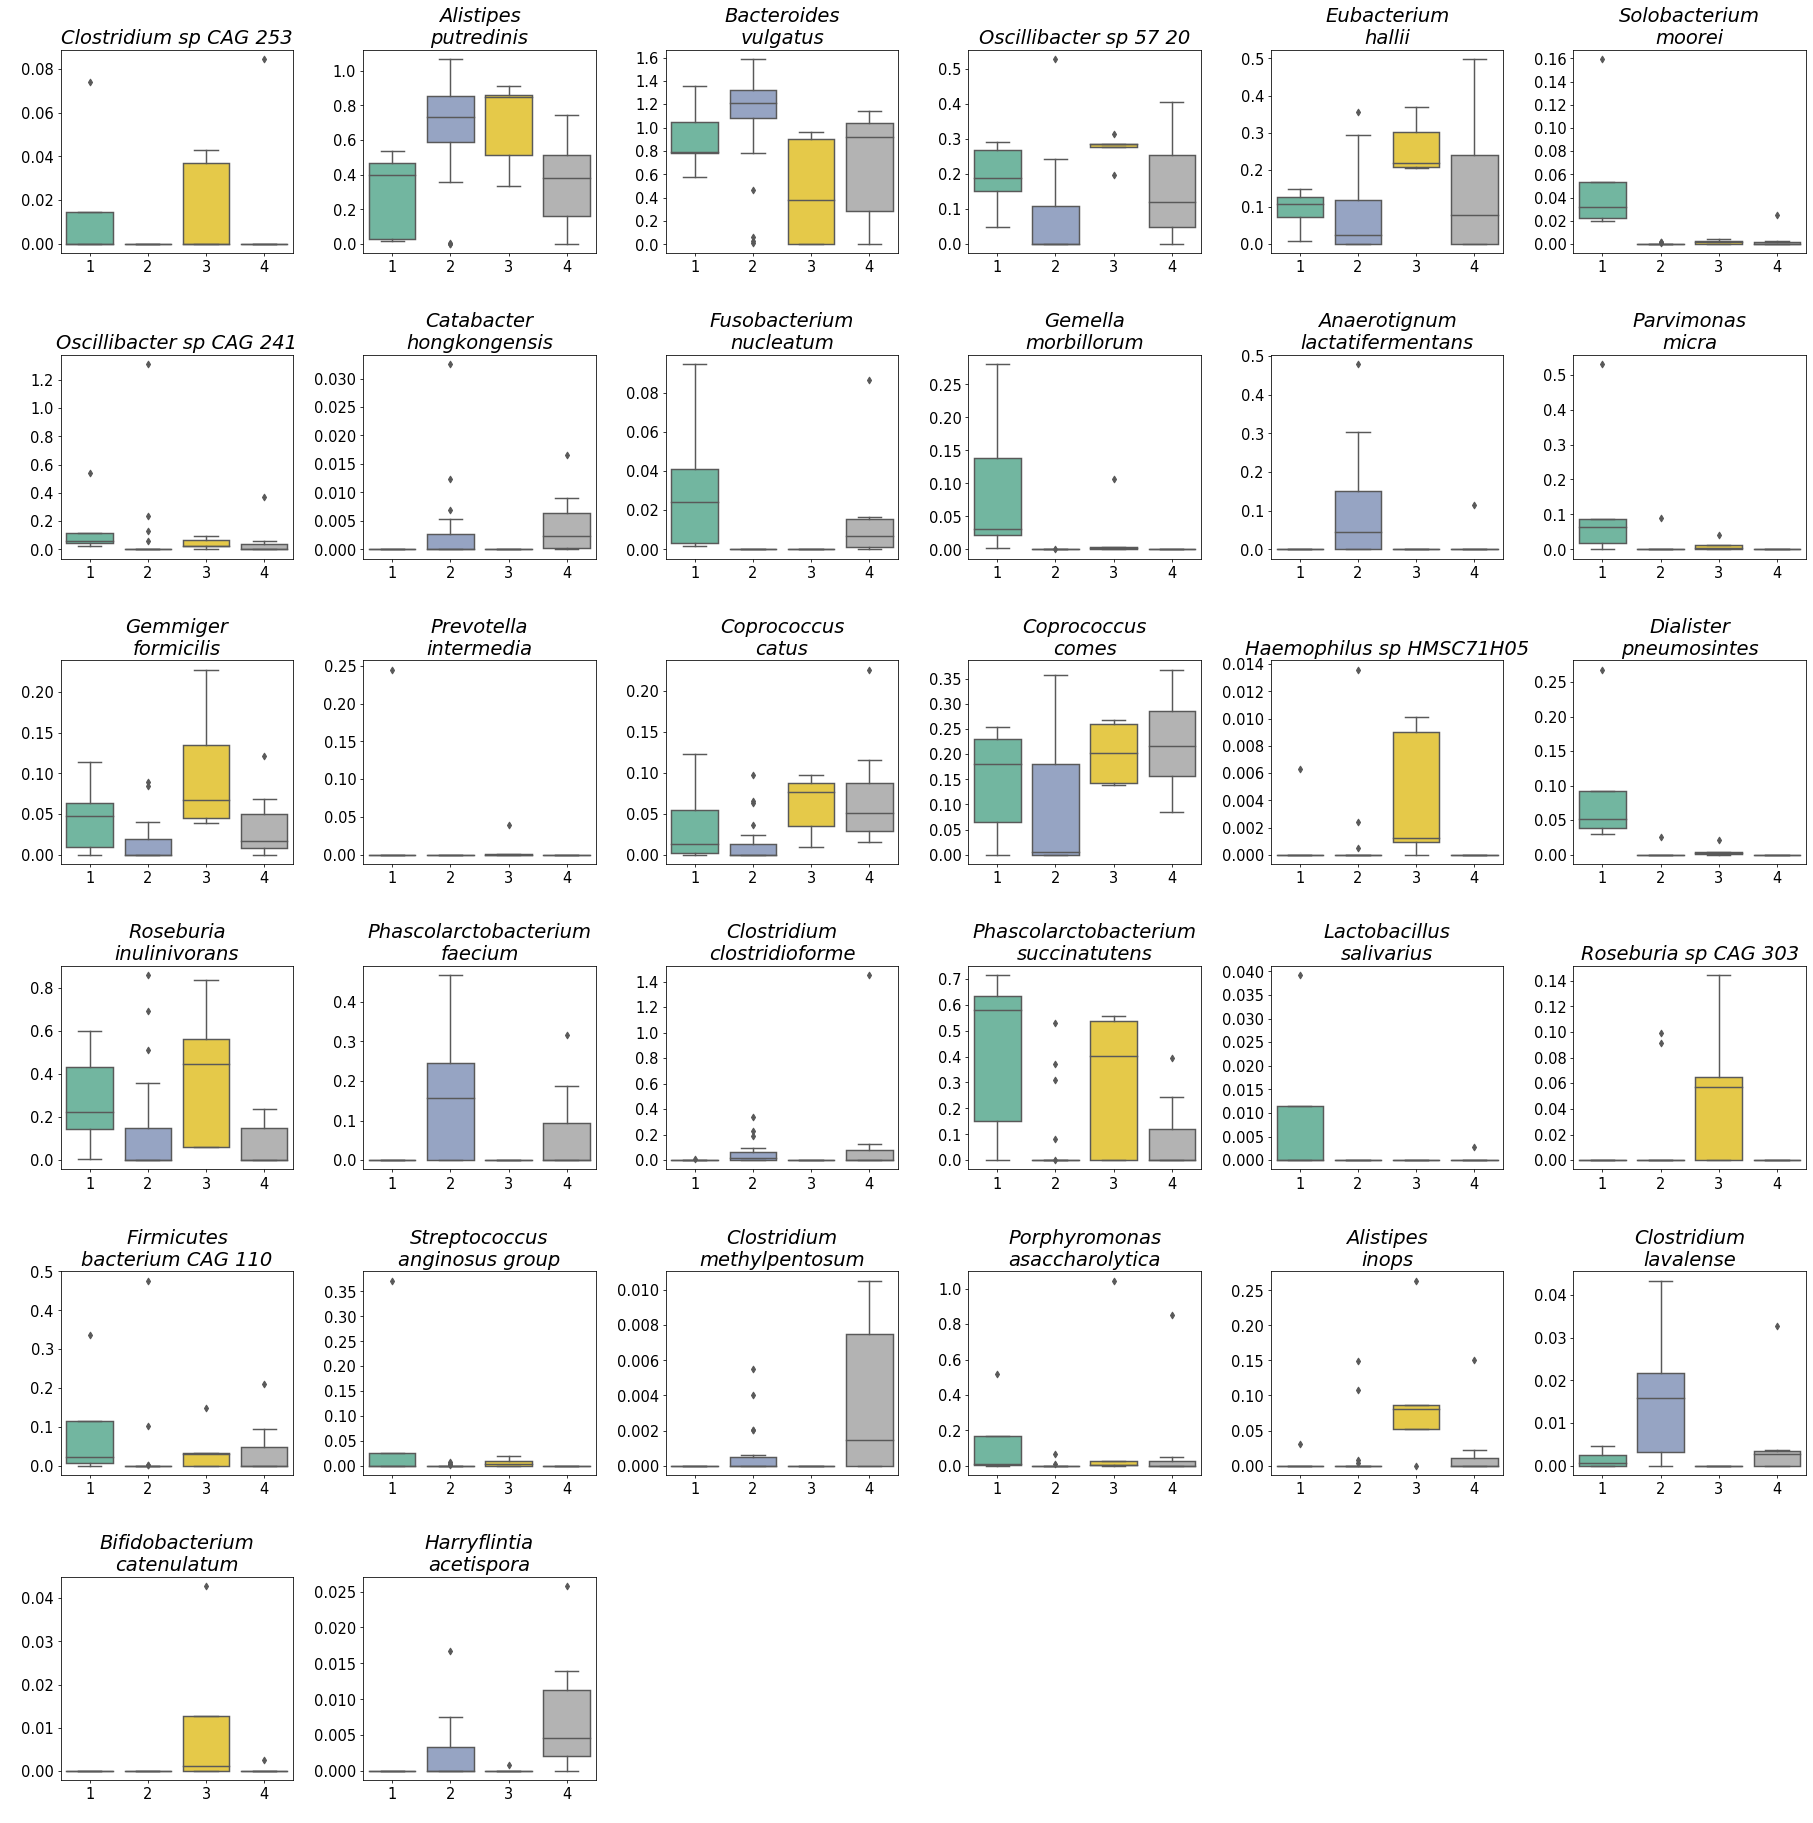

In [21]:
boxplot_cluster('VogtmannE_2016',sig_vogtmann,nrows=7,ncols=6,wspace=0.3,hspace=0.5,figsize=(26,30))

# 3. WirbelJ_2018

In [22]:
sig_wirbel = u_test_study('WirbelJ_2018')

Number of significant bacteria: 15


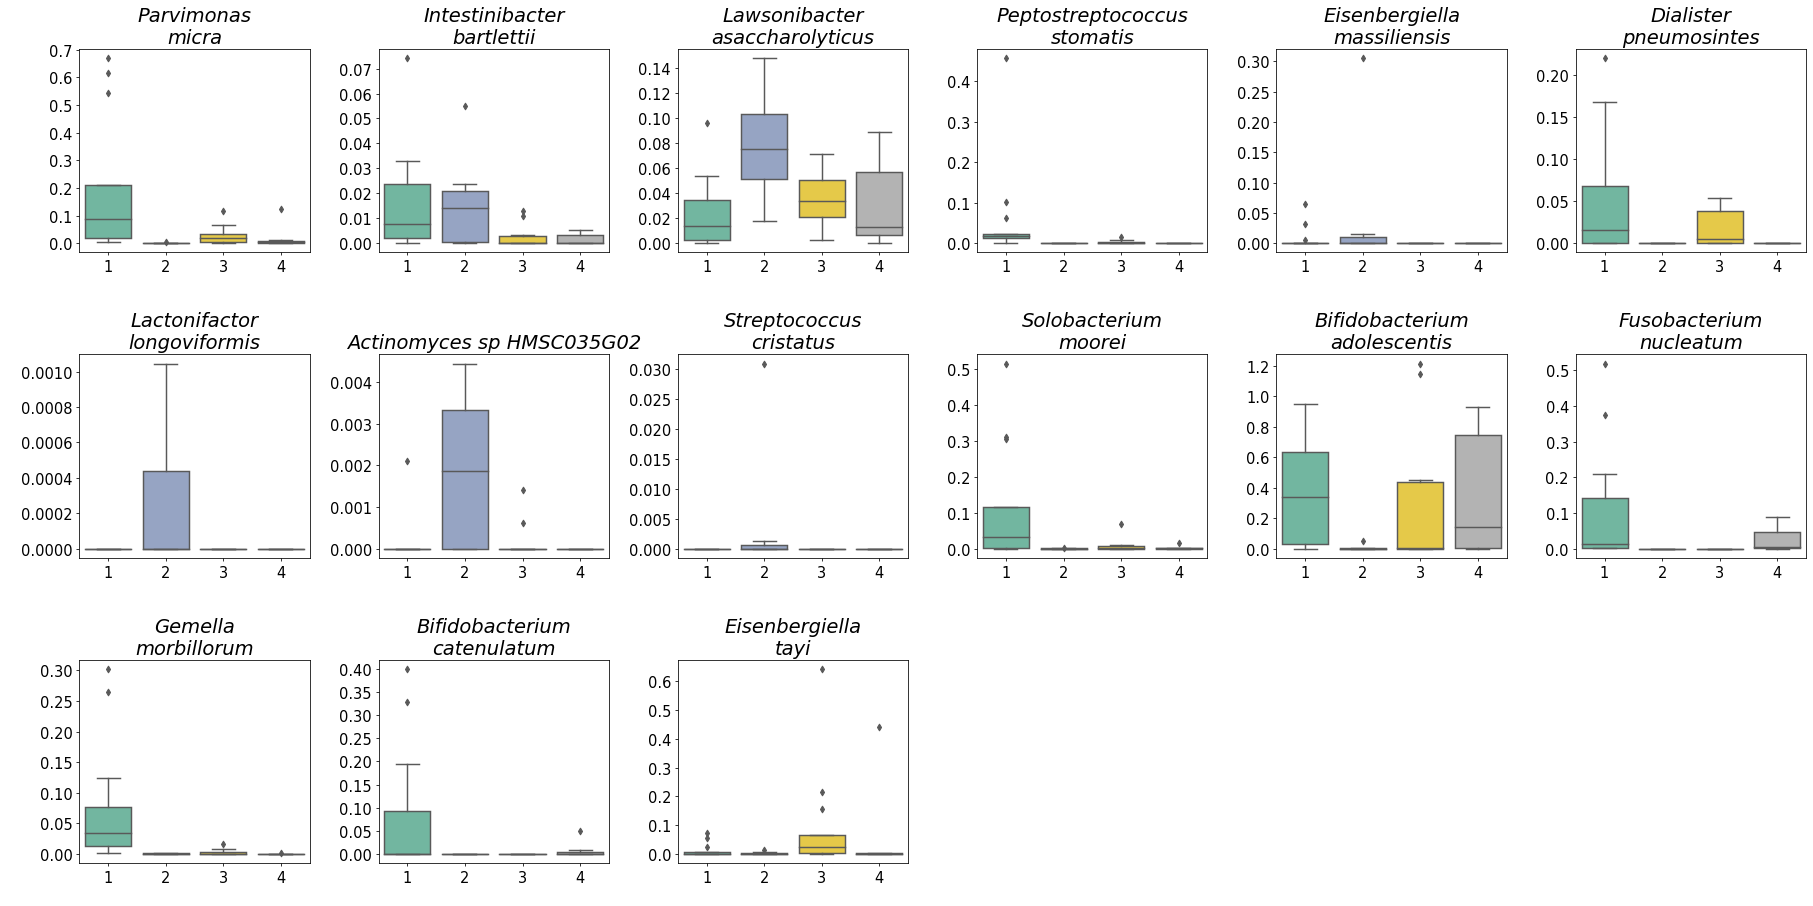

In [23]:
boxplot_cluster('WirbelJ_2018',sig_wirbel,nrows=7,ncols=6,wspace=0.3,hspace=0.5,figsize=(26,30))

# 4. YuJ_2015

In [24]:
sig_yu = u_test_study('YuJ_2015')

Number of significant bacteria: 31


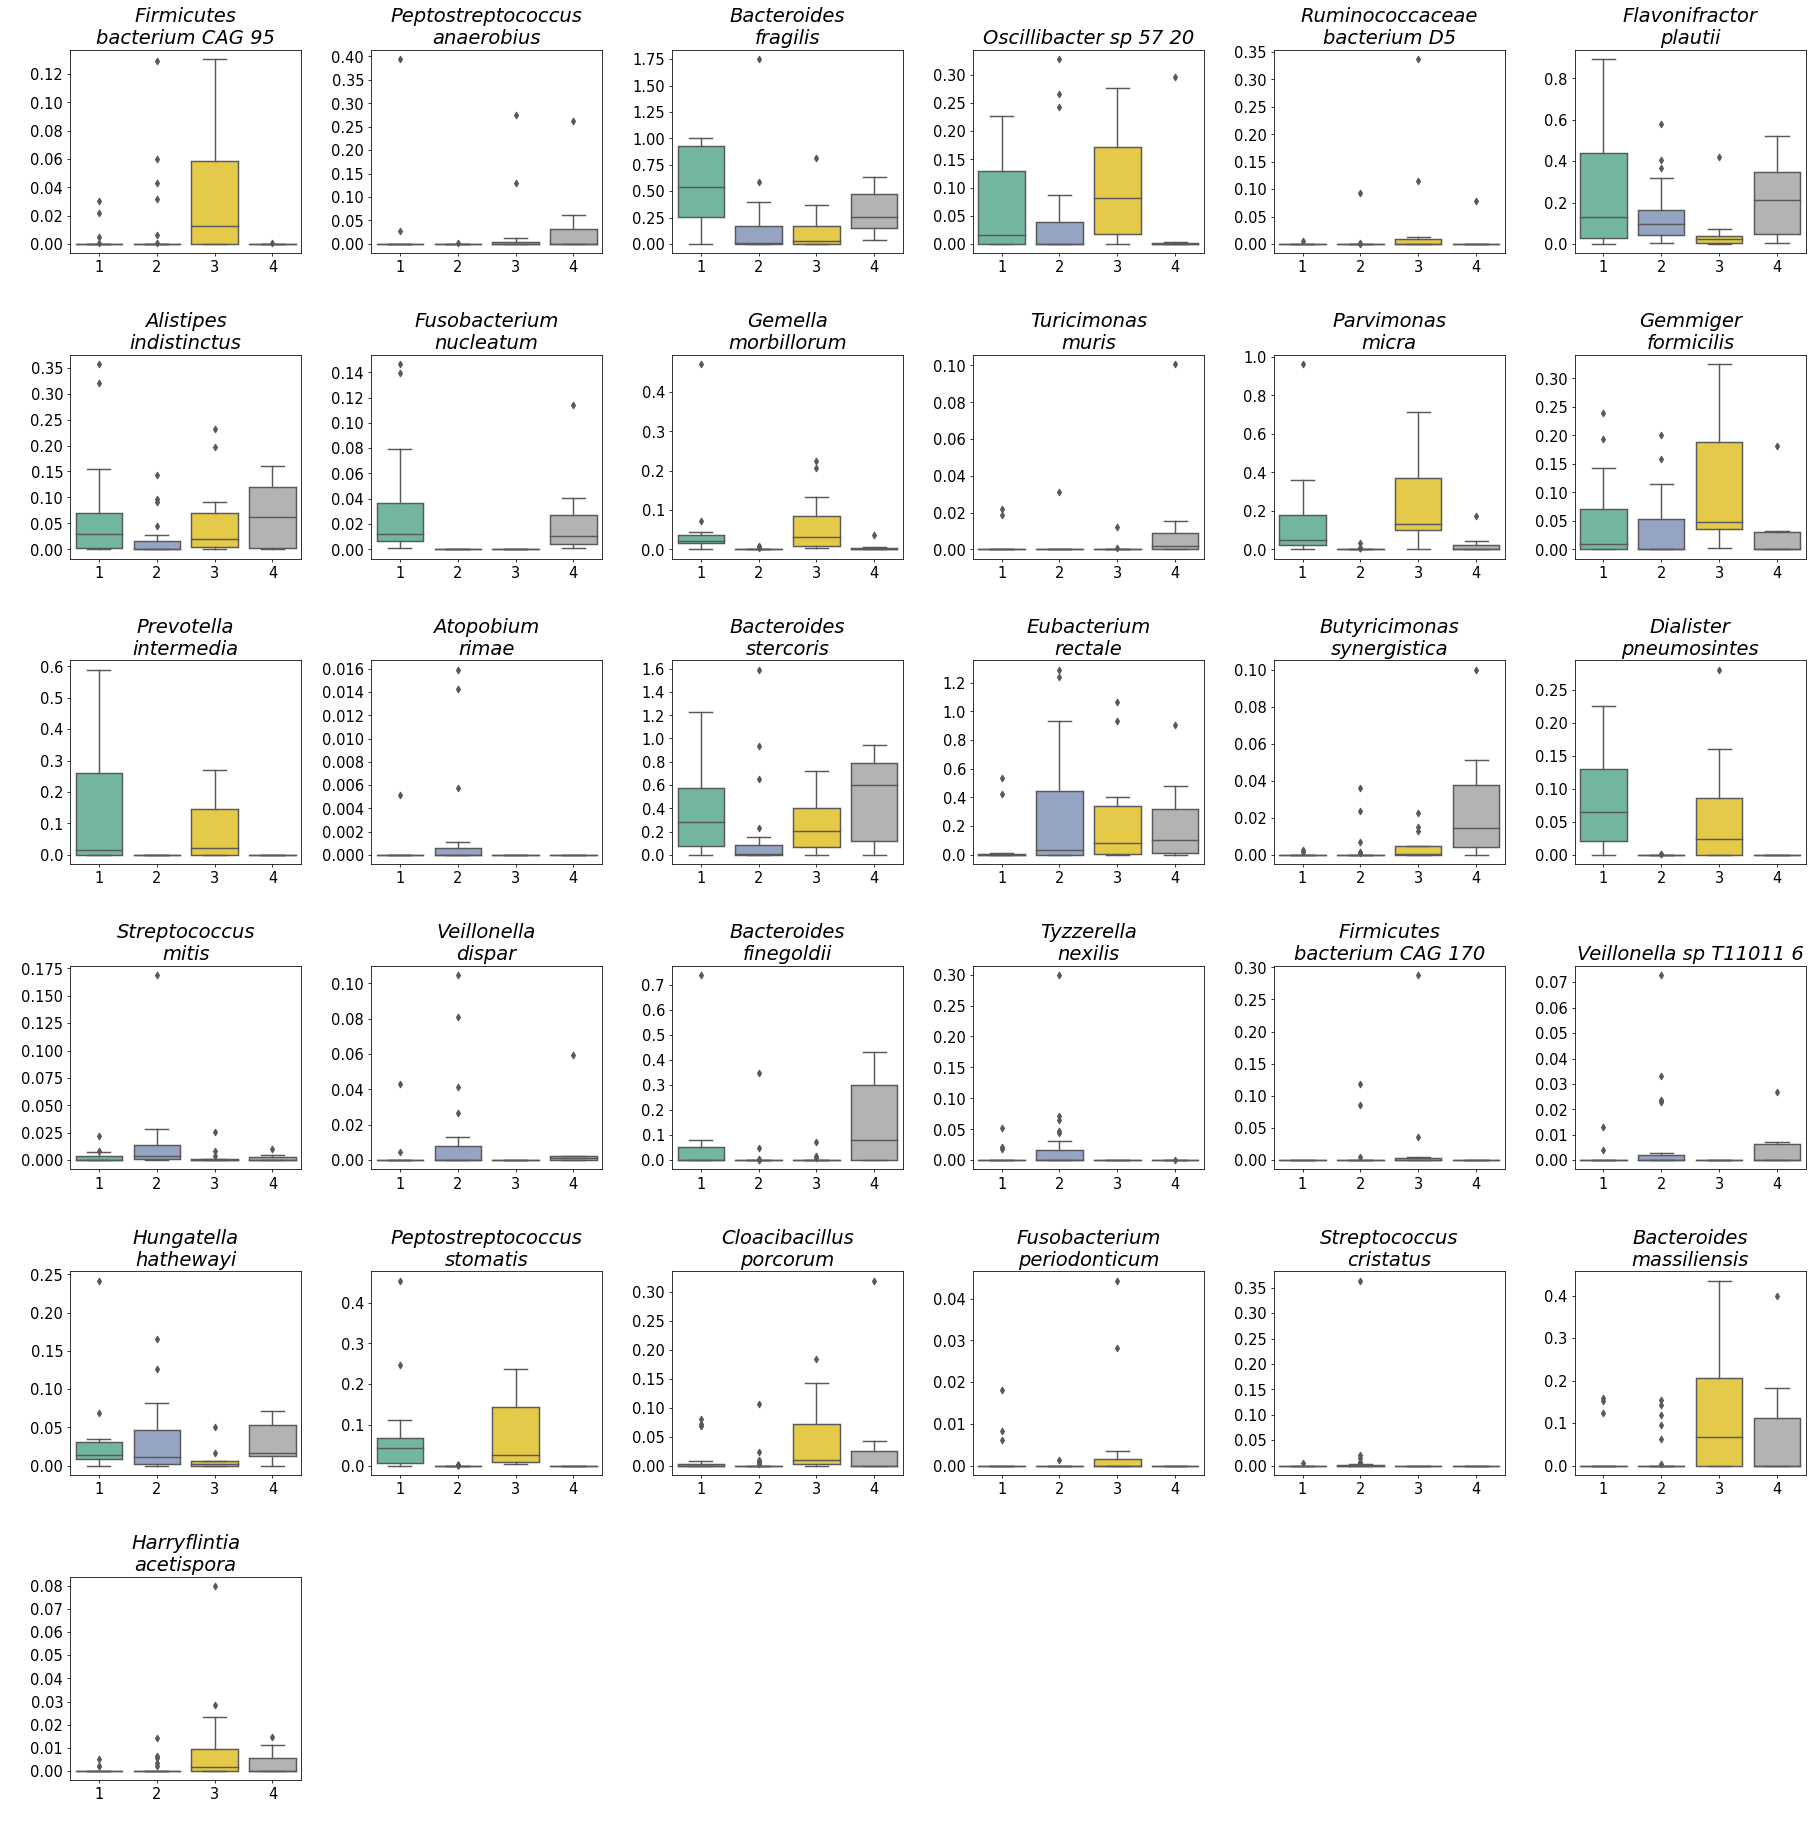

In [25]:
boxplot_cluster('YuJ_2015',sig_yu,nrows=7,ncols=6,wspace=0.3,hspace=0.5,figsize=(26,30))

# 5. ZellerG_2014

In [29]:
sig_zeller = u_test_study('ZellerG_2014')

Number of significant bacteria: 45


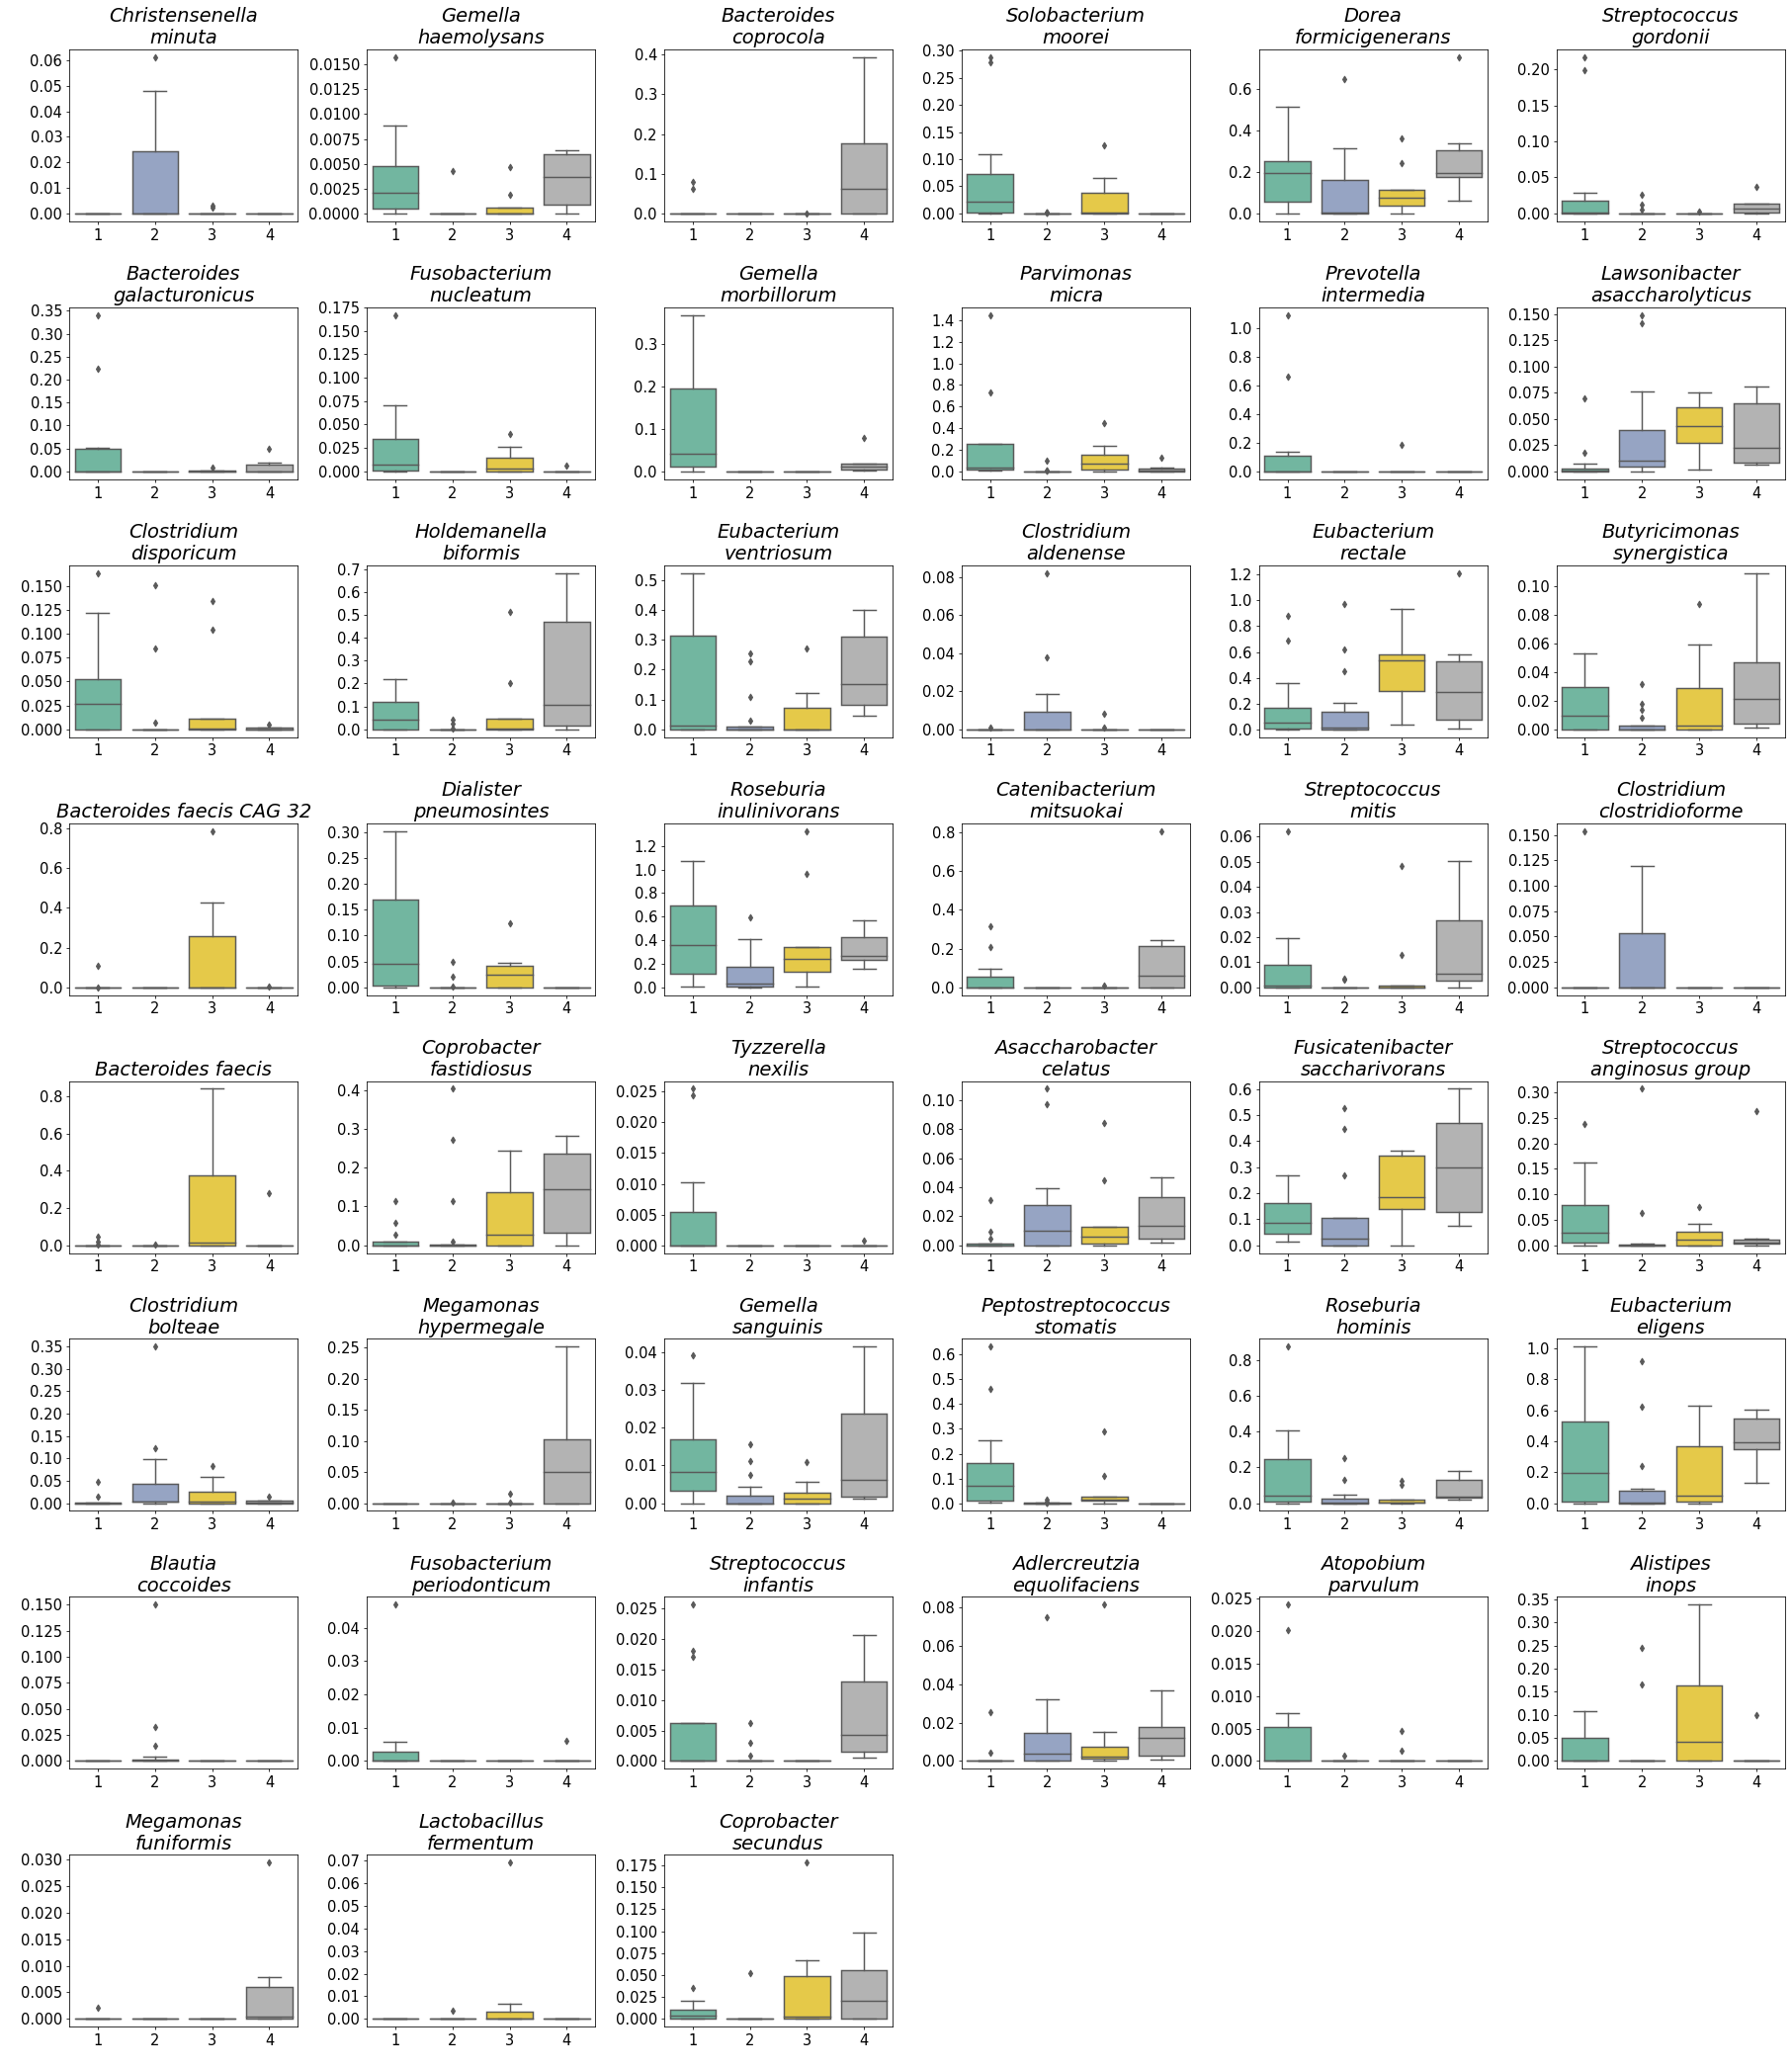

In [30]:
boxplot_cluster('ZellerG_2014',sig_zeller,nrows=8,ncols=6,wspace=0.3,hspace=0.5,figsize=(26,30))